<a href="https://colab.research.google.com/github/LizcanoJuan1010/Machine-Learning-Projects/blob/main/K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Taller K-means

*   Juan Jose Lizcano
*   Maria Fernanda Del Corral
*   David Santiago Gomez

Importamos las librerias necesarias

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score



# Parte 1

Importamos el Data set

In [ ]:
df = pd.read_csv('/content/kmeans_dataset.csv')


In [ ]:
df.head()

,Feature_1,Feature_2
0,0.943776,1.246380
1,0.921489,1.099754
2,0.930273,1.005432
3,0.935165,1.337223
4,0.906957,1.084256


Graficamos para conocer la dispercion general de los datos

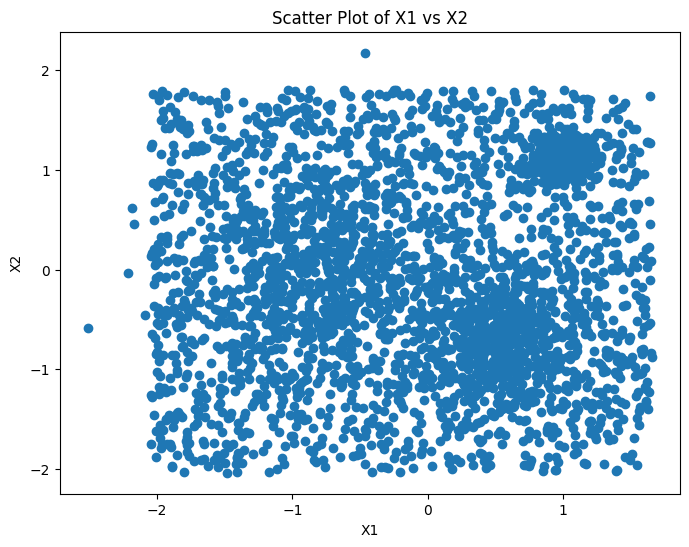

In [ ]:

plt.figure(figsize=(8, 6))
plt.scatter(df['Feature_1'], df['Feature_2'])
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Scatter Plot of X1 vs X2')
plt.show()


Realizamos el grafico de codo para conocer cuantos cluster realizamos

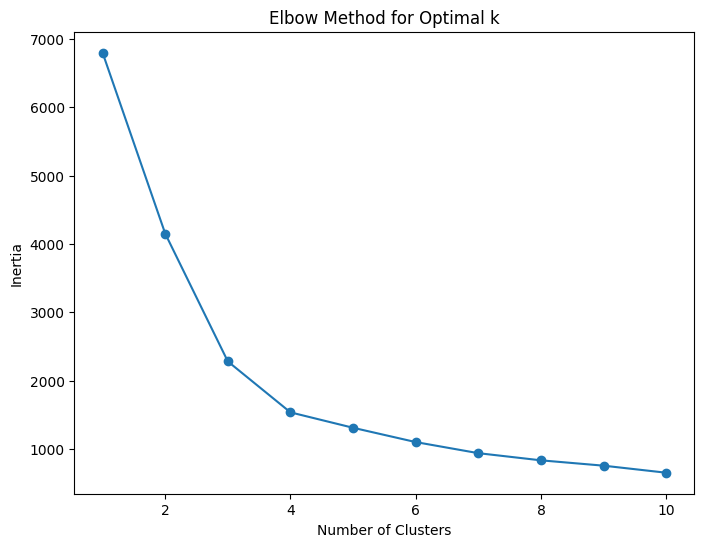

In [ ]:

inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df[['Feature_1', 'Feature_2']])
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


Se observa que se puede utilizar un k de 3 o 4, porbamos con ambos.

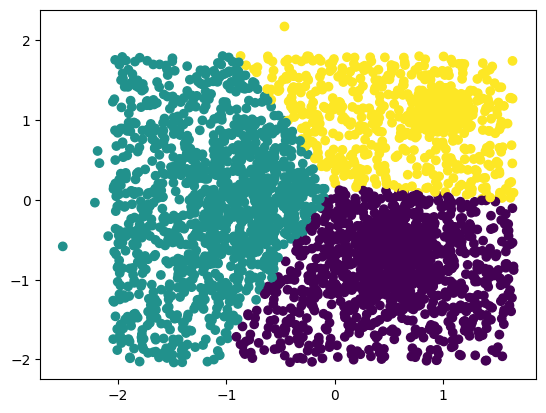

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)

plt.scatter(df['Feature_1'], df['Feature_2'], c=kmeans.labels_)
plt.show()

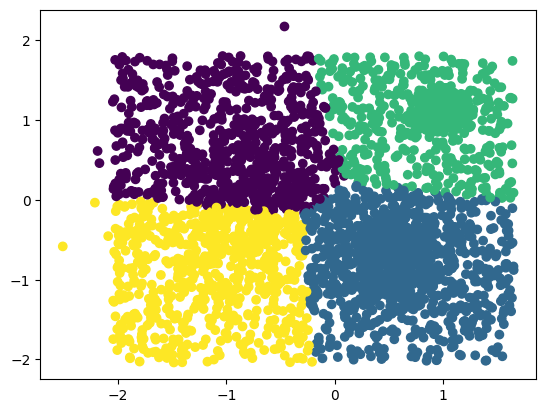

In [ ]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(df)

plt.scatter(df['Feature_1'], df['Feature_2'], c=kmeans.labels_)
plt.show()

Los dos modelos obtenidos son correctos, aunque decidimos quedarnos con el modelo con K=3.
Esto porque es mas optimo y visualizamos mejores resultados.

#Parte 2

Se descarga el Data set

In [ ]:
df_3d = pd.read_csv('/content/3d_clusters_dataset.csv')

Vemos los primeros datos del data set y nos damos cuenta wue tenemos datos en tres dimenciones

In [ ]:
df_3d.head()

,Feature_1,Feature_2,Feature_3
0,8.974963,8.698414,8.887730
1,10.083353,9.183306,9.901129
2,8.880975,9.550283,8.939978
3,10.283602,9.964106,10.576047
4,9.770535,9.781256,9.986899


Se decidio realizar las respectivas visualizaciones de cada dimension

Visualizacion variable 1 y 2

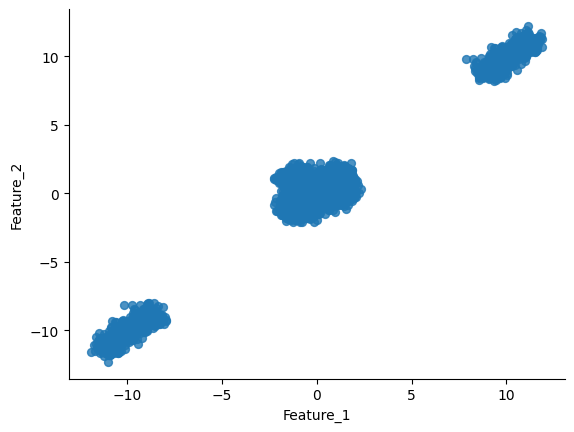

In [ ]:
# @title Feature_1 vs Feature_2

from matplotlib import pyplot as plt
df_3d.plot(kind='scatter', x='Feature_1', y='Feature_2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

Visualizacion variable 2 y 3

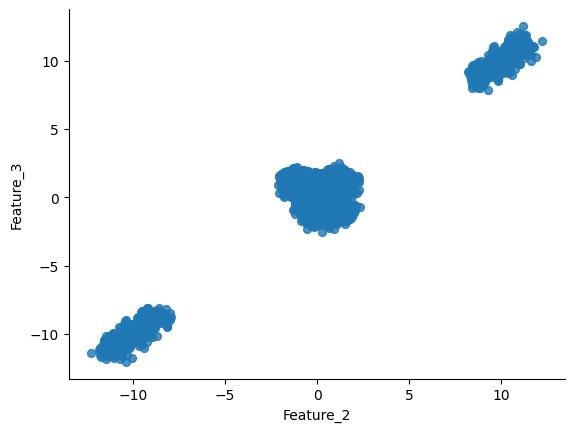

In [ ]:
# @title Feature_2 vs Feature_3

from matplotlib import pyplot as plt
df_3d.plot(kind='scatter', x='Feature_2', y='Feature_3', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

Visualizacion variable 1 y 3

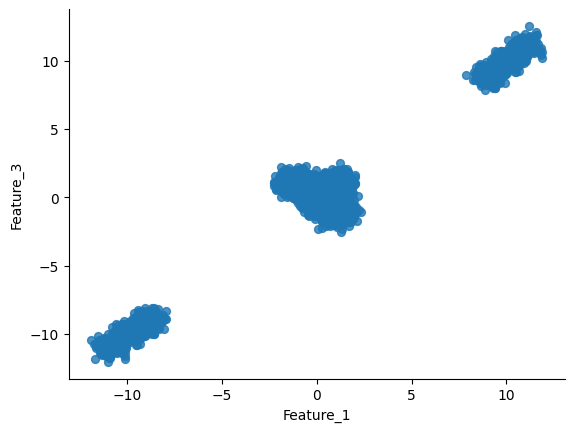

In [ ]:
# @title Feature_1 vs Feature_3
df_3d.plot(kind='scatter', x='Feature_1', y='Feature_3', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

Aplicamos el respectivo modelo a las graficas previas

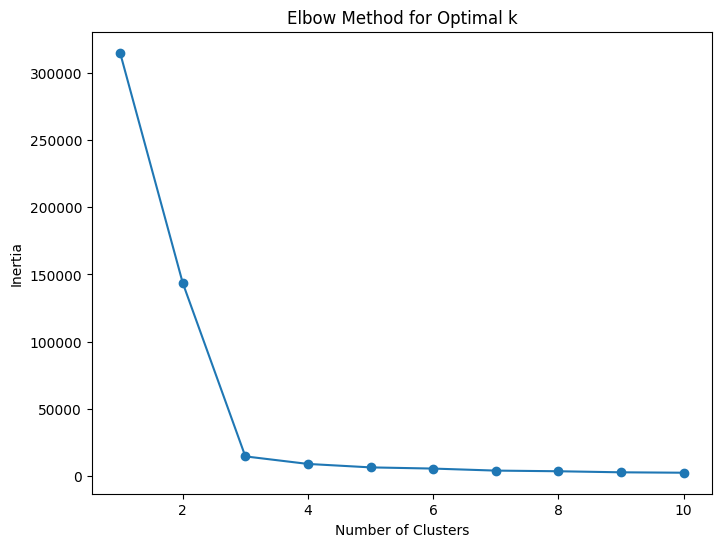

In [ ]:
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_3d[['Feature_1', 'Feature_2','Feature_2']])
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

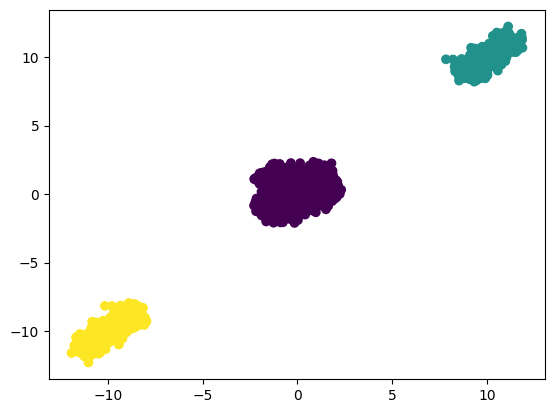

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_3d)

plt.scatter(df_3d['Feature_1'], df_3d['Feature_2'], c=kmeans.labels_)
plt.show()

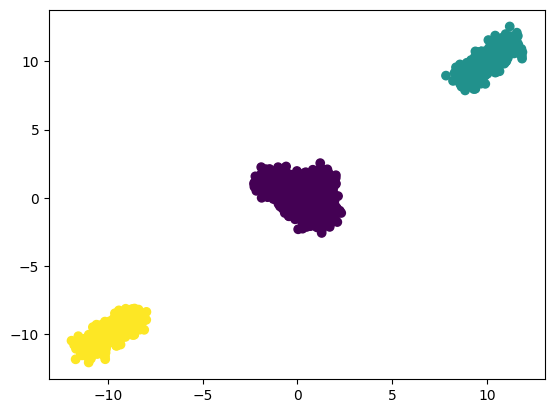

In [ ]:
plt.scatter(df_3d['Feature_1'], df_3d['Feature_3'], c=kmeans.labels_)
plt.show()

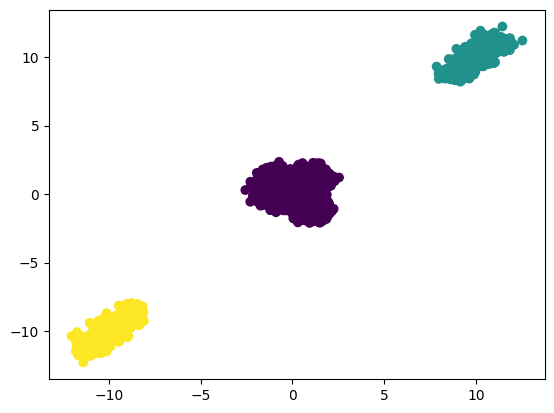

In [ ]:
plt.scatter(df_3d['Feature_3'], df_3d['Feature_2'], c=kmeans.labels_)
plt.show()

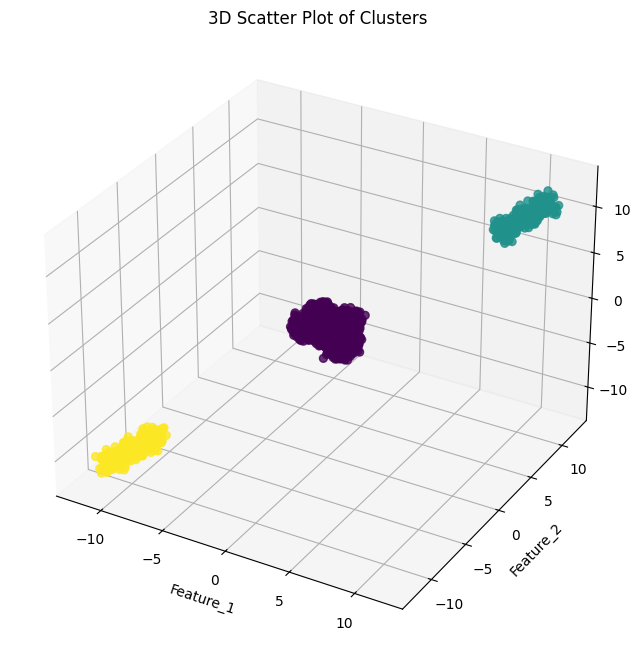

In [ ]:


import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df_3d['Feature_1'], df_3d['Feature_2'], df_3d['Feature_3'], c=kmeans.labels_, s=32, alpha=0.8)

ax.set_xlabel('Feature_1')
ax.set_ylabel('Feature_2')
ax.set_zlabel('Feature_3')
ax.set_title('3D Scatter Plot of Clusters')

plt.show()


In [ ]:

import plotly.express as px

fig = px.scatter_3d(df_3d, x='Feature_1', y='Feature_2', z='Feature_3', color=kmeans.labels_,opacity=0.8, size_max=1)
fig.show()


A nuestro criterio, con 3 clusters es suficiente, sin embargo decidimos probar con mas.

 Primero realizamos de nuevo la grafica de codo, omitiendo los 3 primeros valores

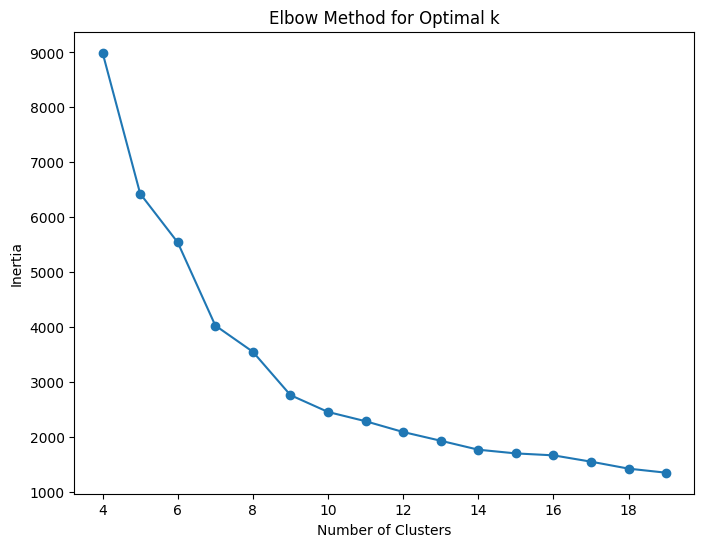

In [ ]:
inertia = []
for i in range(4, 20):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_3d[['Feature_1', 'Feature_2','Feature_2']])
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(4, 20), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

Decidimos probar con 5, 7 y 9 K


/usr/local/lib/python3.11/dist-packages/matplotlib/collections.py:1008: RuntimeWarning:

invalid value encountered in sqrt



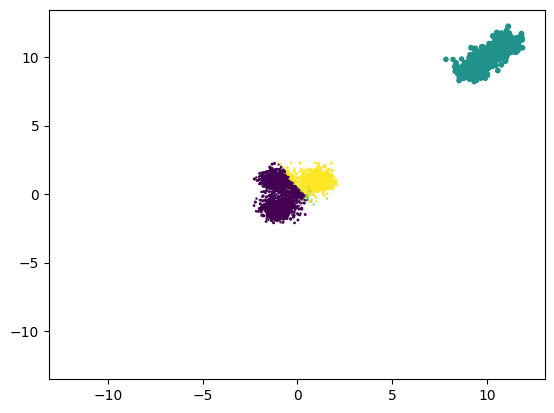

In [ ]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(df_3d)

plt.scatter(df_3d['Feature_1'], df_3d['Feature_2'], df_3d['Feature_3'], c=kmeans.labels_)
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(df_3d)

KMeans(n_clusters=5)

In [ ]:

fig = px.scatter_3d(df_3d, x='Feature_1', y='Feature_2', z='Feature_3', color=kmeans.labels_, opacity=0.8, size_max=1)
fig.show()


/usr/local/lib/python3.11/dist-packages/matplotlib/collections.py:1008: RuntimeWarning:

invalid value encountered in sqrt



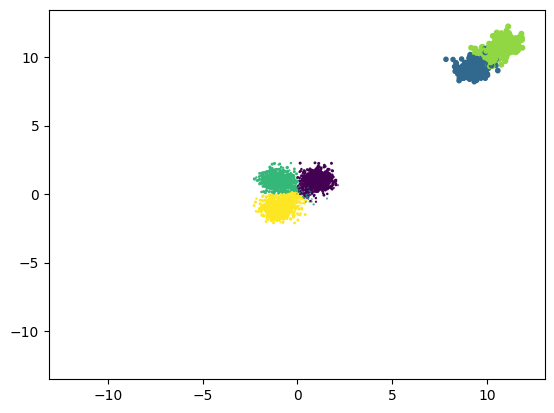

In [ ]:
kmeans = KMeans(n_clusters=7)
kmeans.fit(df_3d)

plt.scatter(df_3d['Feature_1'], df_3d['Feature_2'], df_3d['Feature_3'], c=kmeans.labels_)
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=7)
kmeans.fit(df_3d)

KMeans(n_clusters=7)

In [ ]:
fig = px.scatter_3d(df_3d, x='Feature_1', y='Feature_2', z='Feature_3', color=kmeans.labels_)

fig.show()

/usr/local/lib/python3.11/dist-packages/matplotlib/collections.py:1008: RuntimeWarning:

invalid value encountered in sqrt



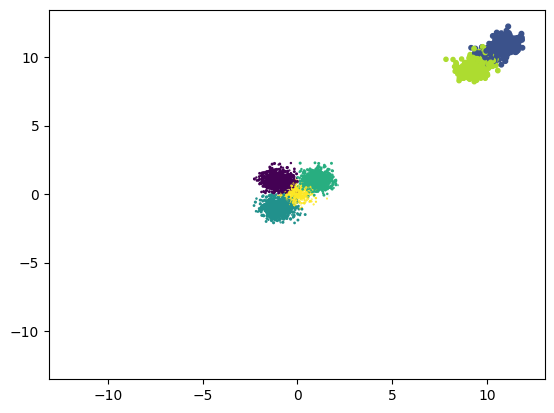

In [ ]:
kmeans = KMeans(n_clusters=9)
kmeans.fit(df_3d)
plt.scatter(df_3d['Feature_1'], df_3d['Feature_2'], df_3d['Feature_3'], c=kmeans.labels_)
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=9)
kmeans.fit(df_3d)

KMeans(n_clusters=9)

In [ ]:
fig = px.scatter_3d(df_3d, x='Feature_1', y='Feature_2', z='Feature_3', color=kmeans.labels_,opacity=0.8, size_max=1)
fig.show()

Al K=9 decidimos que es el mas optimo, ya que no distorciona los clusters y se aprecia bien cada grupo

Tambien decidimos probar con un k grande para comparar

In [ ]:
kmeans = KMeans(n_clusters=20)
kmeans.fit(df_3d)
fig = px.scatter_3d(df_3d, x='Feature_1', y='Feature_2', z='Feature_3', color=kmeans.labels_)
fig.show()

A los K=20 las divisiones apreciadas ya no tienen sentido, ya que los datos del centro no son coherentes, sin embargo, los datos extremos se empiezan a dividir correctamente.

# Division de datos

Para hacer el modelo mejor, se decidio dividir la base de datos en 3, para poder realizar la correcta divisiones de grupos en cada uno de los grupos obtenidos

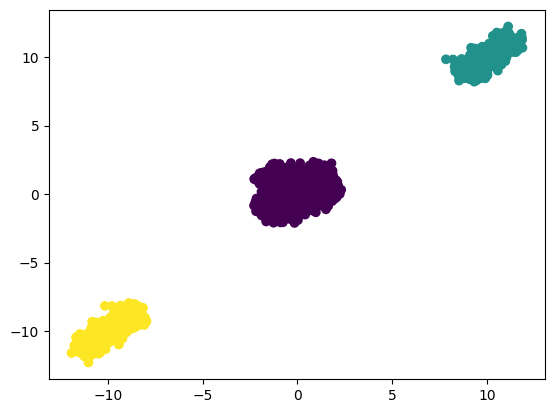

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_3d)

plt.scatter(df_3d['Feature_1'], df_3d['Feature_2'], c=kmeans.labels_)
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_3d[['Feature_1', 'Feature_2', 'Feature_3']])
df_3d['cluster'] = kmeans.labels_

cluster_dfs = {}
for cluster_num in range(3):
  cluster_dfs[cluster_num] = df_3d[df_3d['cluster'] == cluster_num]

cluster_0_df = cluster_dfs[0]
print(cluster_0_df.head())

cluster_1_df = cluster_dfs[1]
print(cluster_1_df.head())

cluster_2_df = cluster_dfs[2]
print(cluster_2_df.head())


      Feature_1  Feature_2  Feature_3  cluster
1000   0.301285   0.730659   0.166979        0
1001  -0.003070   0.340772   0.365947        0
1002   0.987008   1.765075  -1.529938        0
1003  -0.832156   0.654447   1.511786        0
1004  -0.310678   0.376648   0.030607        0
   Feature_1  Feature_2  Feature_3  cluster
0   8.974963   8.698414   8.887730        1
1  10.083353   9.183306   9.901129        1
2   8.880975   9.550283   8.939978        1
3  10.283602   9.964106  10.576047        1
4   9.770535   9.781256   9.986899        1
     Feature_1  Feature_2  Feature_3  cluster
500  -9.025037  -9.301586  -9.112270        2
501  -9.916647 -10.816694 -10.098871        2
502  -9.119025  -8.449717  -9.060022        2
503  -9.716398 -10.035894  -9.423953        2
504 -10.229465 -10.218744 -10.013101        2


In [ ]:
for cluster_num, cluster_df in cluster_dfs.items():
   # 3D scatter plot using plotly
    fig = px.scatter_3d(cluster_df, x='Feature_1', y='Feature_2', z='Feature_3',
                         title=f'Cluster {cluster_num} - 3D Scatter Plot', opacity=0.8, size_max=1)
    fig.show()


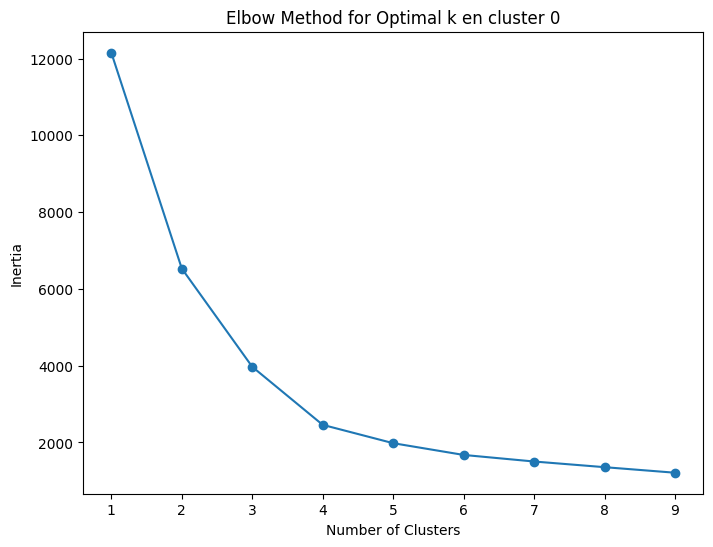

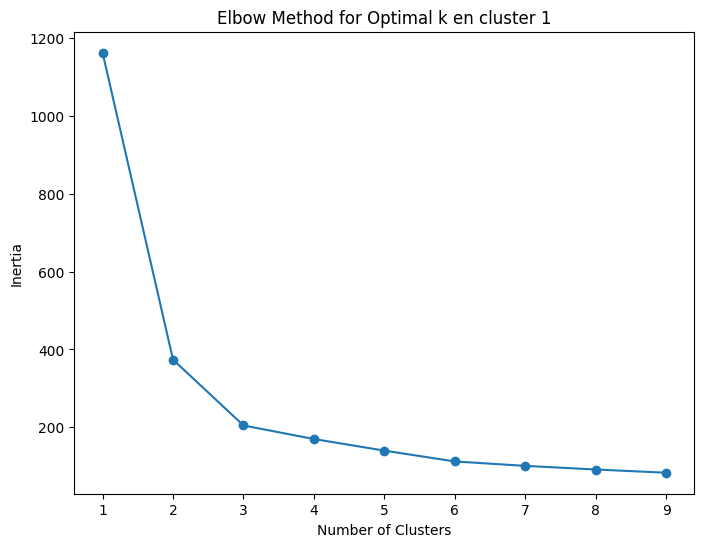

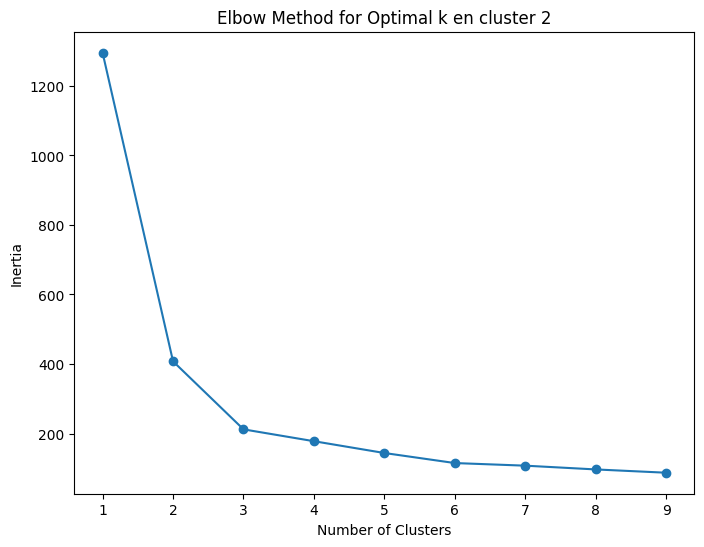

In [ ]:
for cluster_num, cluster_df in cluster_dfs.items():
  inertia = []
  for i in range(1, 10):
      kmeans = KMeans(n_clusters=i, random_state=42)
      kmeans.fit(cluster_df[['Feature_1', 'Feature_2','Feature_2']])
      inertia.append(kmeans.inertia_)

  plt.figure(figsize=(8, 6))
  plt.plot(range(1, 10), inertia, marker='o')
  plt.xlabel('Number of Clusters')
  plt.ylabel('Inertia')
  plt.title(f'Elbow Method for Optimal k en cluster {cluster_num}')
  plt.show()

In [ ]:
kmeans_cluster_0 = KMeans(n_clusters=4, random_state=42)
kmeans_cluster_0.fit(cluster_0_df[['Feature_1', 'Feature_2', 'Feature_3']])

cluster_0_df['sub_cluster'] = kmeans_cluster_0.labels_

fig = px.scatter_3d(cluster_0_df, x='Feature_1', y='Feature_2', z='Feature_3',
                     color='sub_cluster', title='Sub-Clusters within Cluster 0', opacity=0.8, size_max=1)
fig.show()


<ipython-input-34-eb9b026ba06f>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
kmeans_cluster_1 = KMeans(n_clusters=3, random_state=42)
kmeans_cluster_1.fit(cluster_1_df[['Feature_1', 'Feature_2', 'Feature_3']])

cluster_1_df['sub_cluster'] = kmeans_cluster_1.labels_

fig = px.scatter_3d(cluster_1_df, x='Feature_1', y='Feature_2', z='Feature_3',
                     color='sub_cluster', title='Sub-Clusters within Cluster 1', opacity=0.8, size_max=1)
fig.show()


<ipython-input-35-467851d54137>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
kmeans_cluster_2 = KMeans(n_clusters=3, random_state=42)
kmeans_cluster_2.fit(cluster_2_df[['Feature_1', 'Feature_2', 'Feature_3']])

cluster_2_df['sub_cluster'] = kmeans_cluster_2.labels_

fig = px.scatter_3d(cluster_2_df, x='Feature_1', y='Feature_2', z='Feature_3',
                     color='sub_cluster', title='Sub-Clusters within Cluster 2', opacity=0.8, size_max=1)
fig.show()


<ipython-input-36-dc871dd4ca8f>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Conclusiones

A lo largo de los experimentos realizados, abordamos el problema desde múltiples enfoques. Inicialmente, el gráfico de elbow sugería que el número óptimo de clusters era 3. Sin embargo, al excluir los tres primeros valores de k, el análisis reveló un posible óptimo en 9 clusters. Tras evaluar diferentes escenarios, implementamos una estrategia jerárquica: dividimos cada uno de los 3 clusters iniciales en subgrupos mediante K-Means aplicado de forma independiente. Así, el primer cluster se segmentó en 4 subclusters, el segundo en 3 y el tercero también en 3, obteniendo un total de 10 clusters. Este enfoque permitió un análisis más granular sin perder la estructura inicial, equilibrando la interpretabilidad de los resultados con la adaptabilidad a las particularidades de cada subgrupo.

